In [1]:
import pandas as pd

heart_disease_df = pd.read_csv("./dataset/heart-disease.csv") # lê CSV e transforma-o em um DataFrame (df)

In [2]:
# Divide o df em variáveis independetes (X) e dependente (y)
X = heart_disease_df.drop("target", axis = 1)
y = heart_disease_df["target"]

In [3]:
from sklearn.model_selection import train_test_split
# Divide os dados (X e y) em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Como avaliar Modelos de Classificação?

## 1. Acurácia

In [4]:
import numpy as np
# Garante reprodutibilidade ao gerador de números aleatórios
np.random.seed(42)

from sklearn.ensemble import RandomForestClassifier # importa o modelo "Random Forest Classifier"

clf = RandomForestClassifier() # instancia o modelo com hiper-parâmetros padrões

clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [5]:
np.random.seed(42)

from sklearn.model_selection import cross_val_score # importa a métrica "Cross Validation"
# Armazena a média da Cross Validation com K Fold (K = 5)
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv = 5, scoring = None))
print(f"Cross Validation Acurácia: {clf_cross_val_score * 100:.2f}%")

Cross Validation Acurácia: 82.48%


## 2. Area Under Curve (AUC) ROC (Receiver Operating Characteristic)

Para mais informações, veja a [documentação](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) oficial.

A **Curva ROC** é um gráfico que mostra a relação entre taxa de verdadeiros positivos `TPR` e taxa de falsos positivos `FPR` para vários limiares de classificação.

| Termo               | Sigla | Significado                           |
| ------------------- | ----- | ------------------------------------- |
| Verdadeiro Positivo | TP    | Modelo previu positivo e era positivo |
| Falso Positivo      | FP    | Modelo previu positivo e era negativo |
| Verdadeiro Negativo | TN    | Modelo previu negativo e era negativo |
| Falso Negativo      | FN    | Modelo previu negativo e era positivo |

### O que a Curva ROC mostra?

* Cada ponto na curva representa um limiar (***threshold***) diferente.

* O `eixo X` (horizontal) representa o `FPR`.

* O `eixo Y` (vertical) representa o `TPR`.

* A curva começa em (0,0) e termina em (1,1).

| Situação                                         | Explicação                                          |
| ------------------------------------------------ | --------------------------------------------------- |
| Curva próxima do **canto superior esquerdo**     | Excelente modelo: muitos acertos, poucos erros      |
| Curva na **diagonal** (linha em 45°)             | Modelo aleatório (ex.: jogar moeda)                 |
| Curva **abaixo da diagonal**                     | Modelo pior que aleatório                           |


### Quando usar a Curva ROC?

* Quando o problema tem classes balanceadas ou você quer analisar o desempenho independente do *threshold*.

* Para comparar modelos de classificação.

* Para visualizar o *trade-off* entre sensibilidade e especificidade.

#### Limitações

* A ROC pode ser enganosa em datasets desbalanceados, pois `FPR` pode parecer pequeno mesmo quando há muitos `FPs`. Nesse caso, Precision-Recall Curve pode ser mais apropriada.

---

A **área sob a curva (AUC)** é um número entre **0** e **1** que resume o desempenho da curva; quanto mais próximo de 1, melhor.

### Interpretação geral da **AUC**

| AUC       | Interpretação                        |
| --------- | ------------------------------------ |
| 0.9 – 1   | Excelente                            |
| 0.8 – 0.9 | Muito bom                            |
| 0.7 – 0.8 | Razoável                             |
| 0.6 – 0.7 | Ruim                                 |
| 0.5       | Aleatório (sem poder discriminativo) |

In [6]:
y_proba = clf.predict_proba(X_test) # obtém as probabilidades de ambas as classes (0 e 1)
y_proba[:5] # Exibe as 5 primeiras probabilidades [proba. de 0, proba. de 1]

array([[0.89, 0.11],
       [0.84, 0.16],
       [0.53, 0.47],
       [0.87, 0.13],
       [0.01, 0.99]])

In [7]:
y_proba_positive = y_proba[:,1] # Seleciona apenas a probabilidade da classe positiva (classe 1)
y_proba_positive[:5] # Mostra os 5 primeiros valores (p/ fazer "cara-crachá")

array([0.11, 0.16, 0.47, 0.13, 0.99])

In [8]:
from sklearn.metrics import roc_curve # Importa a função para calcular curva ROC

fpr, tpr, thresholds =  roc_curve(y_test, y_proba_positive)
# fpr → taxa de falso positivo
# tpr → taxa de verdadeiro positivo
# thresholds → os limiares que geraram cada ponto da curva
# y_test (y_true) → os rótulos verdadeiros (gabarito)
# y_proba_positive (y_score) → as probabilidades preditas da classe positiva

A função `roc_curve()` varre vários ***thresholds*** (limiares entre **0** e **1**) e, para cada um deles, calcula:

* Quantos exemplos foram classificados como positivos

* Desses, quantos eram `verdadeiros positivos (TP)` e quantos eram `falsos positivos (FP)`

Com isso, monta os pontos da `curva ROC`:

* **Eixo X** (FPR) = FP / (FP + TN)

* **Eixo Y** (TPR) = TP / (TP + FN)

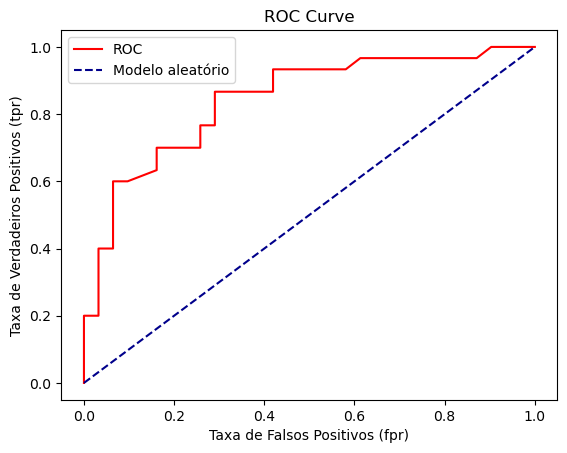

In [9]:
import matplotlib.pyplot as plt

# Plota a Curva ROC passando as taxas de Falso Positivo (fpr) e Verdadeiro Possitivo (tpr) como parâmetro
def plot_roc_curve(fpr, tpr):
    # Plota a curva Roc
    plt.plot(fpr, tpr, color = "red", label = "ROC")
    # Plota um "modelo" sem poder de previsão (baseline)
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle = "--", label = "Modelo aleatório")

    # Customiza os plots
    plt.xlabel("Taxa de Falsos Positivos (fpr)")
    plt.ylabel("Taxa de Verdadeiros Positivos (tpr)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [10]:
from sklearn.metrics import roc_auc_score # importa a métrica "roc_auc_score" da biblioteca "metrics" do SciKit-Learn

# Retorna a área sob a curva (AUC) ROC; diretamente proporcional à qualidade do modelo (clf)
roc_auc_score(y_test, y_proba_positive)

0.8419354838709678

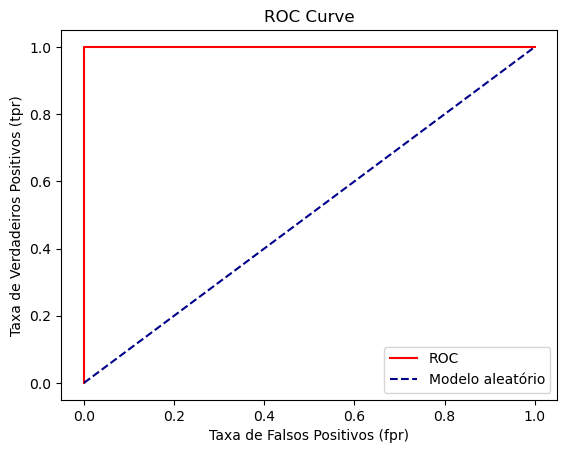

In [11]:
# Plotando um modelo "perfeito"
fpr, tpr, thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

In [12]:
# Já dá para imaginar sua AUC, não é?
print(f'AUC "perfeito": {roc_auc_score(y_test, y_test)}')

AUC "perfeito": 1.0


## 3. Confusion Matrix

É uma **tabela 2x2** que mostra os acertos e erros do modelo, comparando as previsões com os valores reais.

### Estrutura da Matriz de Confusão

|                   | **Predito: 0** | **Predito: 1** |
| ----------------- | -------------- | -------------- |
| **Verdadeiro: 0** | TN             | FP             |
| **Verdadeiro: 1** | FN             | TP             |

| Sigla | Nome                                | Significado                          |
| ----- | ----------------------------------- | ------------------------------------ |
| TP    | True Positive (Verdadeiro Positivo) | Modelo acertou ao prever 1           |
| TN    | True Negative (Verdadeiro Negativo) | Modelo acertou ao prever 0           |
| FP    | False Positive (Falso Positivo)     | Modelo errou prevendo 1 quando era 0 |
| FN    | False Negative (Falso Negativo)     | Modelo errou prevendo 0 quando era 1 |


In [13]:
from sklearn.metrics import confusion_matrix # importa a função que calcula a matriz de confusão

y_preds = clf.predict(X_test) # o modelo "clf" prevê as classes com base nos dados de teste

# Compara os valores reais (y_test) com as classes previstas (y_preds) e retorna uma matriz com TP, TN, FP e FN
confusion_matrix(y_test, y_preds)

array([[22,  9],
       [ 7, 23]])

In [14]:
# Alternativa visual usando "pandas.crosstab()" para gerar uma tabela com rótulos mais intuitivos
pd.crosstab(y_test, y_preds, rownames = ["Actual Labels"], colnames = ["Predict Labels"])

Predict Labels,0,1
Actual Labels,,
0,22,9
1,7,23


In [15]:
24 + 3 + 8 + 26, len(y_test) # "prova real"

(61, 61)

<Axes: >

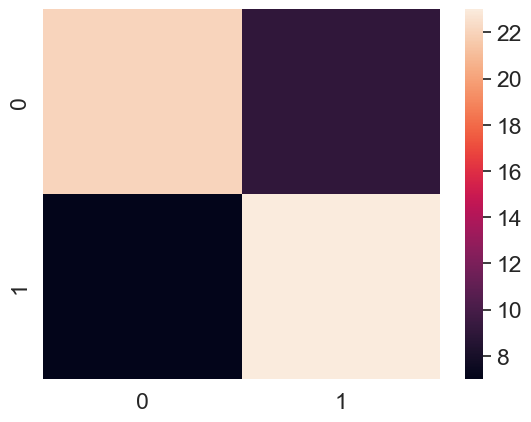

In [16]:
import seaborn as sns # importa biblioteca que facilita visualizações com matplotlib 

# Compara os valores reais (y_test) com as classes previstas (y_preds)
conf_mtx = confusion_matrix(y_test, y_preds)

sns.set(font_scale = 1.5) # define o tamanho da fonte nos eixos e rótulos

sns.heatmap(conf_mtx) # cria o heatmap da matriz de confusão: quanto maior o valor, mais quente

### Como visulizar a Confusion Matrix de forma mais eficiente?

Para mais informações, veja a [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay) completa.

* **Confusion Matrix Display**

    * from_estimator( )

    * from_predictions( )

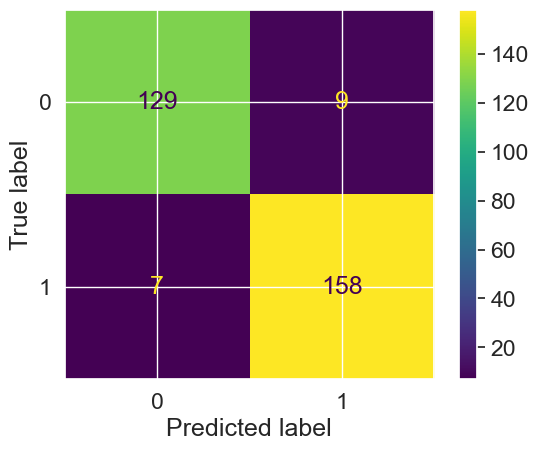

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay # importa a classe para visualização da matriz de confusão

ConfusionMatrixDisplay.from_estimator(clf, X=X, y=y)
# Executa internamente "predict()" no estimador "clf" com os dados (X)
# Compara com os rótulos verdadeiros (y)
# Plota automaticamente a matriz

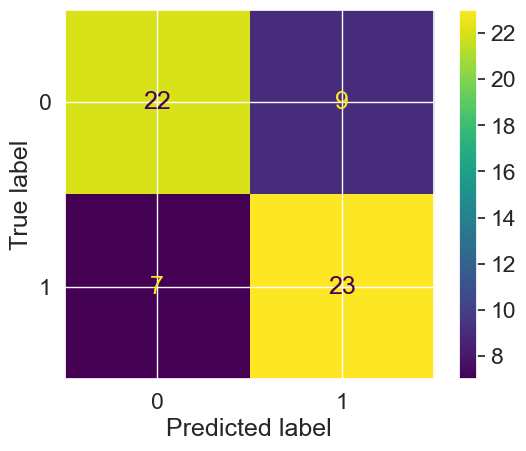

In [18]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_preds)
# Usa os valores preditos (y_preds) que já foram obtidos
# Permite total controle sobre a visualização a partir de previsões manuais
# Ideal já foi feito pré-processamentos ou filtragens em y_preds

#### Diferenças entre `from_estimator( )` e `from_predictions()`

| Característica                         | `from_estimator()`                                               | `from_predictions()`                                                        |
| -------------------------------------- | ---------------------------------------------------------------- | --------------------------------------------------------------------------- |
| **Entrada principal**                  | Um modelo estimador treinado                             | Valores reais (`y_true`) e valores previstos (`y_pred`)                     |
| **Executa `.predict()` internamente?** | ✅ Sim    | ❌ Não                              |
| **Parâmetros obrigatórios**            | `estimator`, `X`, `y`                                            | `y_true`, `y_pred`                                                          |
| **Ideal quando**                       | Você quer visualizar direto após treinar o modelo                | Você já tem as predições feitas ou quer comparar previsões específicas      |
| **Controle sobre *threshold***           | ❌ Não permite alterar          | ✅ Sim — você pode binarizar `y_pred` com qualquer *threshold* antes de passar |
| **Leitura e clareza**                  | Boa, mas mais automática                                         | Maior controle sobre rótulos, classes, títulos e métricas                   |
| **Personalização posterior**           | Limitada                                 | ✅ Sim — permite armazenar o objeto e usar `.plot()` para customizações      |


## 4. Classification Report

O `classification_report` gera uma tabela com métricas detalhadas para cada classe do modelo de classificação. Ele mostra:

* **Precision**

* **Recall**

* **F1-Score**

* **Support**

Essas métricas ajudam a entender não só quantos acertos o modelo fez, mas como ele acertou e onde ele está errando.

### Como interpretar a métrica?

| Métrica       | Fórmula                                       | Interpretação                                                        |
| ------------- | --------------------------------------------- | -------------------------------------------------------------------- |
| **Precision** | TP / (TP + FP)                                | Das predições positivas, quantas estavam corretas?                   |
| **Recall**    | TP / (TP + FN)                                | Dos exemplos realmente positivos, quantos foram encontrados? |
| **F1-Score**  | Média harmônica entre `precision` e `recall`  | Balanceia `precision` e `recall`                                     |
| **Support**   |                                               | Quantidade real de ocorrências daquela classe                        |
| **Accuracy**  |                                               | Porcentagem geral de acerto                                          |
| **Macro avg** |                                               | Média simples das métricas das classes (sem peso pelo `support`)   |
| **Weighted avg** |                                            | Média ponderada pelas ocorrências de cada classe (mais útil em datasets desbalanceados) |

### ⚠️ Atenção com datasets desbalanceados

Em problemas onde uma classe aparece muito mais que a outra (ex.: 95% classe 0, 5% classe 1), a **acurácia** pode enganar. Nesses casos, fique de olho no `recall` da classe minoritária e no `F1-score`.

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        31
           1       0.72      0.77      0.74        30

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

